In [ ]:
import pandas as pd
df_train = pd.read_csv("/content/train_data.csv")
df_test = pd.read_csv("/content/test_data.csv")
df_train.fillna(0,inplace=True)
df_test.fillna(0,inplace=True)

In [ ]:
xtrain = df_train.drop("label",axis=1).values
xtrain = xtrain.reshape((1905,32,32,3))/255
ytrain = df_train["label"].values
list(set(ytrain))
# xtrain.shape

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [ ]:
xtest = df_test.drop("label",axis=1).values
xtest = xtest/255
ytest = df_test["label"].values
xtest.shape

(1900, 3072)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dropout,Dense,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape=(32,32,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.summary()

In [ ]:
h = model.fit(xtrain,ytrain,epochs=50,validation_split=0.2)

Epoch 1/50
48/48 [==============================] - 0s 10ms/step - loss: 1.1226 - accuracy: 0.5827 - val_loss: 1.5469 - val_accuracy: 0.4409
Epoch 2/50
48/48 [==============================] - 0s 8ms/step - loss: 1.0021 - accuracy: 0.6470 - val_loss: 1.5622 - val_accuracy: 0.4593
Epoch 3/50
48/48 [==============================] - 0s 8ms/step - loss: 0.9830 - accuracy: 0.6424 - val_loss: 1.5791 - val_accuracy: 0.4383
Epoch 4/50
48/48 [==============================] - 0s 8ms/step - loss: 0.8140 - accuracy: 0.7165 - val_loss: 1.5411 - val_accuracy: 0.4751
Epoch 5/50
48/48 [==============================] - 0s 6ms/step - loss: 0.7455 - accuracy: 0.7487 - val_loss: 1.5834 - val_accuracy: 0.4856
Epoch 6/50
48/48 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.7861 - val_loss: 1.7098 - val_accuracy: 0.4357
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 0.5665 - accuracy: 0.8058 - val_loss: 1.7078 - val_accuracy: 0.4593
Epoch 8/50
48/48 [=

60/60 [==============================] - 0s 2ms/step
0 0.0


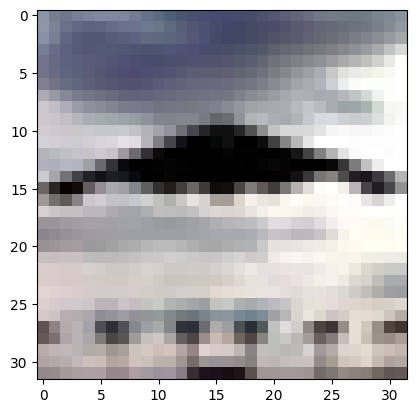

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
xtest = xtest.reshape((1900,32,32,3))
plt.imshow(xtest[111],cmap="Greys")
yp = model.predict(xtest)
va = np.argmax(yp[111])
print(va,ytest[111])